In [56]:
!pip install geopy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import geopy
from geopy.geocoders import Nominatim
warnings.filterwarnings('ignore')
print("> all packages imported")

> all packages imported


## Analyse des présidentielles 2022

## 1er tour

### Preprocessing

In [33]:
ftd = pd.read_csv("./data/tour-1/elections-presidentielles2022-1ertour.csv", sep=';')

In [34]:
ftd.head()

,id_bvote,quartier_bv,arr_bv,sec_bv,circ_bv,numero_tour,date_tour,type_election,nb_inscrit,nb_votant,...,melenchon_jean_luc,hidalgo_anne,jadot_yannick,pecresse_valerie,poutou_philippe,dupont_aignan_nicolas,geo_shape,geo_point_2d,annee,num_bureau
0,12-41,45,12,12,8,1,2022-04-10,Présidentielle,1310.0,1077,...,293.0,25.0,102.0,83,6.0,13.0,"{""coordinates"": [[[2.40219892928073, 48.837109...","48.83811024485814,2.40272463294792",2022,41
1,17-32,68,17,17,3,1,2022-04-10,Présidentielle,1482.0,1198,...,318.0,22.0,115.0,88,7.0,8.0,"{""coordinates"": [[[2.322263719093833, 48.89190...","48.89187344768119,2.3252029725865366",2022,32
2,14-30,53,14,14,11,1,2022-04-10,Présidentielle,1410.0,1118,...,203.0,30.0,98.0,82,5.0,13.0,"{""coordinates"": [[[2.327793961205971, 48.83618...","48.83950940201273,2.328454503332543",2022,30
3,15-30,58,15,15,12,1,2022-04-10,Présidentielle,1556.0,1293,...,200.0,26.0,109.0,151,5.0,13.0,"{""coordinates"": [[[2.306425990321979, 48.84365...","48.84227322718995,2.3084119063393698",2022,30
4,15-78,60,15,15,13,1,2022-04-10,Présidentielle,1078.0,845,...,273.0,17.0,54.0,59,4.0,11.0,"{""coordinates"": [[[2.283422729557035, 48.84022...","48.83959117351086,2.279389678598105",2022,78


In [35]:
ftd.tail()

,id_bvote,quartier_bv,arr_bv,sec_bv,circ_bv,numero_tour,date_tour,type_election,nb_inscrit,nb_votant,...,melenchon_jean_luc,hidalgo_anne,jadot_yannick,pecresse_valerie,poutou_philippe,dupont_aignan_nicolas,geo_shape,geo_point_2d,annee,num_bureau
894,14-45,55,14,14,10,1,2022-04-10,Présidentielle,1562.0,1123,...,522.0,23.0,49.0,41,4.0,12.0,"{""coordinates"": [[[2.323747450557006, 48.82016...","48.82236463011968,2.3205958784741236",2022,45
895,19-43,74,19,19,16,1,2022-04-10,Présidentielle,1400.0,907,...,462.0,12.0,23.0,24,4.0,13.0,"{""coordinates"": [[[2.37167416180715, 48.895480...","48.89434524101644,2.3738968266610696",2022,43
896,15-68,57,15,15,13,1,2022-04-10,Présidentielle,1714.0,1355,...,257.0,17.0,95.0,125,5.0,13.0,"{""coordinates"": [[[2.293373028465064, 48.83581...","48.83696459924645,2.2921726703139282",2022,68
897,3-9,12,3,1,5,1,2022-04-10,Présidentielle,1640.0,1255,...,351.0,41.0,111.0,67,3.0,8.0,"{""coordinates"": [[[2.353334003367725, 48.86127...","48.862913040524454,2.3521921621269155",2022,9
898,13-5,49,13,13,9,1,2022-04-10,Présidentielle,1527.0,1211,...,368.0,40.0,98.0,60,9.0,11.0,"{""coordinates"": [[[2.3618871317521313, 48.8328...","48.83455486387303,2.3608667579947404",2022,5


In [44]:
ftd.drop(['numero_tour', 'type_election', 'annee', 'date_tour'], axis=1)

,id_bvote,quartier_bv,arr_bv,sec_bv,circ_bv,nb_inscrit,nb_votant,nb_emargement,nb_procuration,nb_exprime,...,zemmour_eric,melenchon_jean_luc,hidalgo_anne,jadot_yannick,pecresse_valerie,poutou_philippe,dupont_aignan_nicolas,geo_shape,geo_point_2d,num_bureau
0,12-41,45,12,12,8,1310.0,1077,1077.0,53.0,1057.0,...,61.0,293.0,25.0,102.0,83,6.0,13.0,"{""coordinates"": [[[2.40219892928073, 48.837109...","48.83811024485814,2.40272463294792",41
1,17-32,68,17,17,3,1482.0,1198,1198.0,69.0,1187.0,...,59.0,318.0,22.0,115.0,88,7.0,8.0,"{""coordinates"": [[[2.322263719093833, 48.89190...","48.89187344768119,2.3252029725865366",32
2,14-30,53,14,14,11,1410.0,1118,1118.0,77.0,1103.0,...,85.0,203.0,30.0,98.0,82,5.0,13.0,"{""coordinates"": [[[2.327793961205971, 48.83618...","48.83950940201273,2.328454503332543",30
3,15-30,58,15,15,12,1556.0,1293,1293.0,82.0,1281.0,...,140.0,200.0,26.0,109.0,151,5.0,13.0,"{""coordinates"": [[[2.306425990321979, 48.84365...","48.84227322718995,2.3084119063393698",30
4,15-78,60,15,15,13,1078.0,845,845.0,26.0,837.0,...,62.0,273.0,17.0,54.0,59,4.0,11.0,"{""coordinates"": [[[2.283422729557035, 48.84022...","48.83959117351086,2.279389678598105",78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,14-45,55,14,14,10,1562.0,1123,1123.0,48.0,1102.0,...,68.0,522.0,23.0,49.0,41,4.0,12.0,"{""coordinates"": [[[2.323747450557006, 48.82016...","48.82236463011968,2.3205958784741236",45
895,19-43,74,19,19,16,1400.0,907,905.0,26.0,892.0,...,73.0,462.0,12.0,23.0,24,4.0,13.0,"{""coordinates"": [[[2.37167416180715, 48.895480...","48.89434524101644,2.3738968266610696",43
896,15-68,57,15,15,13,1714.0,1355,1355.0,81.0,1333.0,...,118.0,257.0,17.0,95.0,125,5.0,13.0,"{""coordinates"": [[[2.293373028465064, 48.83581...","48.83696459924645,2.2921726703139282",68
897,3-9,12,3,1,5,1640.0,1255,1255.0,104.0,1237.0,...,72.0,351.0,41.0,111.0,67,3.0,8.0,"{""coordinates"": [[[2.353334003367725, 48.86127...","48.862913040524454,2.3521921621269155",9


In [36]:
ftd.shape

(899, 31)

In [37]:
ftd.columns

Index(['id_bvote', 'quartier_bv', 'arr_bv', 'sec_bv', 'circ_bv', 'numero_tour',
       'date_tour', 'type_election', 'nb_inscrit', 'nb_votant',
       'nb_emargement', 'nb_procuration', 'nb_exprime', 'nb_vote_blanc',
       'nb_vote_nul', 'arthaud_nathalie', 'roussel_fabien', 'macron_emmanuel',
       'lassalle_jean', 'le_pen_marine', 'zemmour_eric', 'melenchon_jean_luc',
       'hidalgo_anne', 'jadot_yannick', 'pecresse_valerie', 'poutou_philippe',
       'dupont_aignan_nicolas', 'geo_shape', 'geo_point_2d', 'annee',
       'num_bureau'],
      dtype='object')

In [38]:
ftd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_bvote               899 non-null    object 
 1   quartier_bv            899 non-null    int64  
 2   arr_bv                 899 non-null    int64  
 3   sec_bv                 899 non-null    int64  
 4   circ_bv                899 non-null    int64  
 5   numero_tour            899 non-null    int64  
 6   date_tour              899 non-null    object 
 7   type_election          899 non-null    object 
 8   nb_inscrit             899 non-null    float64
 9   nb_votant              899 non-null    int64  
 10  nb_emargement          899 non-null    float64
 11  nb_procuration         899 non-null    float64
 12  nb_exprime             899 non-null    float64
 13  nb_vote_blanc          899 non-null    float64
 14  nb_vote_nul            899 non-null    float64
 15  arthau

In [39]:
ftd.isnull().sum()

id_bvote                 0
quartier_bv              0
arr_bv                   0
sec_bv                   0
circ_bv                  0
numero_tour              0
date_tour                0
type_election            0
nb_inscrit               0
nb_votant                0
nb_emargement            0
nb_procuration           0
nb_exprime               0
nb_vote_blanc            0
nb_vote_nul              0
arthaud_nathalie         0
roussel_fabien           0
macron_emmanuel          0
lassalle_jean            0
le_pen_marine            0
zemmour_eric             0
melenchon_jean_luc       0
hidalgo_anne             0
jadot_yannick            0
pecresse_valerie         0
poutou_philippe          0
dupont_aignan_nicolas    0
geo_shape                0
geo_point_2d             0
annee                    0
num_bureau               0
dtype: int64

In [40]:
ftd.head()

,id_bvote,quartier_bv,arr_bv,sec_bv,circ_bv,numero_tour,date_tour,type_election,nb_inscrit,nb_votant,...,melenchon_jean_luc,hidalgo_anne,jadot_yannick,pecresse_valerie,poutou_philippe,dupont_aignan_nicolas,geo_shape,geo_point_2d,annee,num_bureau
0,12-41,45,12,12,8,1,2022-04-10,Présidentielle,1310.0,1077,...,293.0,25.0,102.0,83,6.0,13.0,"{""coordinates"": [[[2.40219892928073, 48.837109...","48.83811024485814,2.40272463294792",2022,41
1,17-32,68,17,17,3,1,2022-04-10,Présidentielle,1482.0,1198,...,318.0,22.0,115.0,88,7.0,8.0,"{""coordinates"": [[[2.322263719093833, 48.89190...","48.89187344768119,2.3252029725865366",2022,32
2,14-30,53,14,14,11,1,2022-04-10,Présidentielle,1410.0,1118,...,203.0,30.0,98.0,82,5.0,13.0,"{""coordinates"": [[[2.327793961205971, 48.83618...","48.83950940201273,2.328454503332543",2022,30
3,15-30,58,15,15,12,1,2022-04-10,Présidentielle,1556.0,1293,...,200.0,26.0,109.0,151,5.0,13.0,"{""coordinates"": [[[2.306425990321979, 48.84365...","48.84227322718995,2.3084119063393698",2022,30
4,15-78,60,15,15,13,1,2022-04-10,Présidentielle,1078.0,845,...,273.0,17.0,54.0,59,4.0,11.0,"{""coordinates"": [[[2.283422729557035, 48.84022...","48.83959117351086,2.279389678598105",2022,78


In [45]:
ftd.shape

(899, 31)

### Analyze

#### Deltas

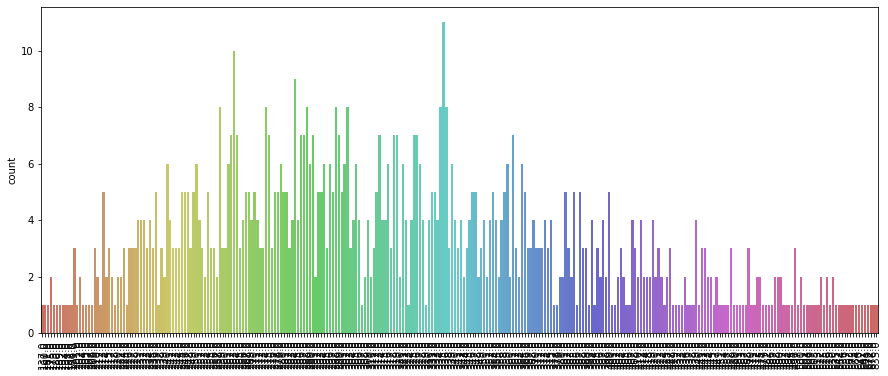

In [49]:
inscrit = ftd['nb_inscrit']
votant = ftd['nb_votant']
delta = [i-v for (i, v) in zip(inscrit, votant)]

plt.figure(figsize=(15,6))
sns.countplot(delta, palette="hls")
plt.xticks(rotation=90)
plt.show()

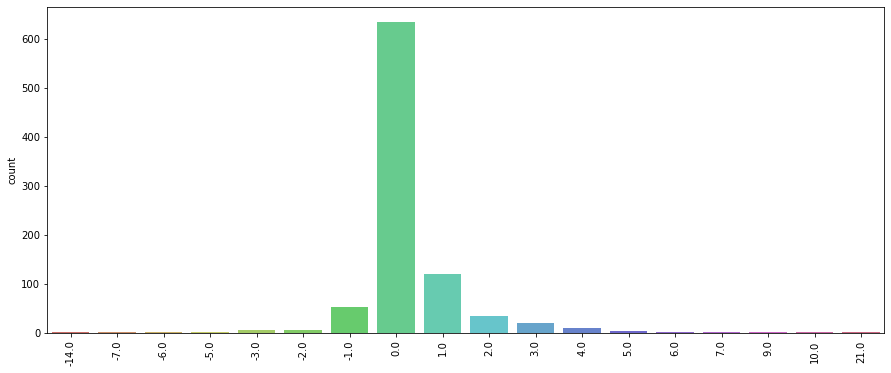

In [50]:
emargement = ftd['nb_emargement']
delta = [v-e for (v, e) in zip(votant, emargement)]

plt.figure(figsize=(15,6))
sns.countplot(delta, palette="hls")
plt.xticks(rotation=90)
plt.show()

### Répartition des votes par ville

In [54]:
ftd['geo_point_2d']

0         48.83811024485814,2.40272463294792
1       48.89187344768119,2.3252029725865366
2        48.83950940201273,2.328454503332543
3       48.84227322718995,2.3084119063393698
4        48.83959117351086,2.279389678598105
                       ...                  
894     48.82236463011968,2.3205958784741236
895     48.89434524101644,2.3738968266610696
896     48.83696459924645,2.2921726703139282
897    48.862913040524454,2.3521921621269155
898     48.83455486387303,2.3608667579947404
Name: geo_point_2d, Length: 899, dtype: object

In [58]:
geolocator = Nominatim(user_agent="presidentielles-analyze")

In [68]:
locations = []

for coo in ftd['geo_point_2d']:
   locations.append(geolocator.reverse(coo))

locations

[Location(8, Rue de Toul, Quartier du Bel-Air, Paris 12e Arrondissement, Paris, Île-de-France, France métropolitaine, 75012, France, (48.8380824, 2.402614, 0.0)),
 Location(École primaire Capitaine Lagache, Rue du Capitaine Lagache, Quartier des Épinettes, Paris 17e Arrondissement, Paris, Île-de-France, France métropolitaine, 75017, France, (48.8919485, 2.3253298, 0.0)),
 Location(Avenue du Boulevard, Quartier du Montparnasse, Paris 14e Arrondissement, Paris, Île-de-France, France métropolitaine, 75014, France, (48.8395781036078, 2.3284772922480625, 0.0)),
 Location(Bains-Douches Blomet, 17, Rue Blomet, Quartier Necker, Paris 15e Arrondissement, Paris, Île-de-France, France métropolitaine, 75015, France, (48.84262175, 2.308123194052656, 0.0)),
 Location(Collège André Citroën, Rue Saint-Charles, Quartier de Javel, Paris 15e Arrondissement, Paris, Île-de-France, France métropolitaine, 75015, France, (48.83935375, 2.2786925816232015, 0.0)),
 Location(Hôtel Le Peletier de Saint-Fargeau, Ru

In [70]:
ftd.insert(2, 'location', locations)

In [72]:
ftd.head()

,id_bvote,quartier_bv,location,arr_bv,sec_bv,circ_bv,numero_tour,date_tour,type_election,nb_inscrit,...,melenchon_jean_luc,hidalgo_anne,jadot_yannick,pecresse_valerie,poutou_philippe,dupont_aignan_nicolas,geo_shape,geo_point_2d,annee,num_bureau
0,12-41,45,"(8, Rue de Toul, Quartier du Bel-Air, Paris 12...",12,12,8,1,2022-04-10,Présidentielle,1310.0,...,293.0,25.0,102.0,83,6.0,13.0,"{""coordinates"": [[[2.40219892928073, 48.837109...","48.83811024485814,2.40272463294792",2022,41
1,17-32,68,"(École primaire Capitaine Lagache, Rue du Capi...",17,17,3,1,2022-04-10,Présidentielle,1482.0,...,318.0,22.0,115.0,88,7.0,8.0,"{""coordinates"": [[[2.322263719093833, 48.89190...","48.89187344768119,2.3252029725865366",2022,32
2,14-30,53,"(Avenue du Boulevard, Quartier du Montparnasse...",14,14,11,1,2022-04-10,Présidentielle,1410.0,...,203.0,30.0,98.0,82,5.0,13.0,"{""coordinates"": [[[2.327793961205971, 48.83618...","48.83950940201273,2.328454503332543",2022,30
3,15-30,58,"(Bains-Douches Blomet, 17, Rue Blomet, Quartie...",15,15,12,1,2022-04-10,Présidentielle,1556.0,...,200.0,26.0,109.0,151,5.0,13.0,"{""coordinates"": [[[2.306425990321979, 48.84365...","48.84227322718995,2.3084119063393698",2022,30
4,15-78,60,"(Collège André Citroën, Rue Saint-Charles, Qua...",15,15,13,1,2022-04-10,Présidentielle,1078.0,...,273.0,17.0,54.0,59,4.0,11.0,"{""coordinates"": [[[2.283422729557035, 48.84022...","48.83959117351086,2.279389678598105",2022,78
